# E.D.A Dataset Grammys 

En este jupyter Notebook se realiza un E.D.A objetivo de analisar y comprender mejor el dataset the_grammy_awards.csv

#### Añadimos el directorio raiz al sys.path para facilitar importaciones 

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /home/cami/workshop_2/workshop2


Si a este codigo lo ejecutas mas de una vez puede que empiese a pasear por tu directorio lo que puede generar errores en las importaiones, si te ocurre reinicia el Kernel y vuelvelo a ejecutar.

#### Importamos las Librerias 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Puede instalar las librerias ejecutando el siguiente comando en la terminal: pip install -r requirements.txt

#### Importamos la conexion

In [3]:
from Base_de_Datos_Operaciones.conexionBD import create_connection

connection = create_connection()

Conectando con la Base de Datos...
Conexion con la Base de Datos MySQL Lograda.


#### Leemos la tabla candidates ubicada en nuesta Base de Datos, y lo almacenamos en un Dataframe

In [4]:
query = "SELECT * FROM Grammys;"
Grammys = pd.read_sql(query, connection)
Grammys.head()

/tmp/ipykernel_100384/1884780702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Grammys = pd.read_sql(query, connection)


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,1
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,1
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,1
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,1
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 07:10:28,2020-05-19 07:10:28,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,1


#### Informacion Sobre el Dataset 

In [5]:
Grammys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          4810 non-null   int64         
 1   title         4810 non-null   object        
 2   published_at  4810 non-null   datetime64[ns]
 3   updated_at    4810 non-null   datetime64[ns]
 4   category      4810 non-null   object        
 5   nominee       4810 non-null   object        
 6   artist        4810 non-null   object        
 7   workers       4810 non-null   object        
 8   img           4810 non-null   object        
 9   winner        4810 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 375.9+ KB


Podemos ver que el Dataset contiene 10 Columnas y 4.810 Filas, tambien se puede evidenciar que 6 de esas columnas son de tipo objec (Contiene texto), 2 de tipo int64 (numericas) y 2 de tipo datetime (fecha y la hora). 

Tambien se pude ver el peso del dataframe que es de 375.9 KB

#### Columnas Dataset Descripcion 

- **year:** El año en el que tuvo lugar la ceremonia de los premios Grammy.
- **title:** El nombre completo del evento o ceremonia, que en este caso es la 62ª edición de los Grammy Awards.
- **published_at:** La fecha y hora en que se publicó la información sobre la nominación o el premio. Está en formato de fecha y hora ISO 8601, incluyendo la zona horaria.
- **updated_at:** La fecha y hora en la que se actualizó la información por última vez, también en formato ISO 8601.
- **category:** La categoría específica del premio. En este caso, la categoría es "Record Of The Year".
- **nominee:** El nombre de la canción nominada para la categoría.
- **artist:** El nombre del artista principal asociado con la nominación.
- **workers:** Lista de los productores, ingenieros, mezcladores y otros profesionales que trabajaron en la grabación. Esto puede incluir varios roles asociados con la producción del disco.
- **img:** URL de la imagen asociada con el artista o nominación, que probablemente sea un retrato o foto del artista.
- **winner:** Indica si la canción/artista ganó el premio en esa categoría. Se representa como un valor booleano (True si ganó, False si no).

#### Revisamos la presencia de valores nulos

In [6]:
Valores_nulos = Grammys.isnull().sum()
print(Valores_nulos)

year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64


No hay presencia de valores nulos en el Dataset 

#### Revisamos la presencia de valores duplicados

In [7]:
valores_duplicados = Grammys.duplicated().sum()
print(valores_duplicados)

0


No hay presencia de datos dupliados 

#### Revisamos la presencia de datos atipicos

Para la columna de Los artistas haremos un grafico de barras de los mas nominados 

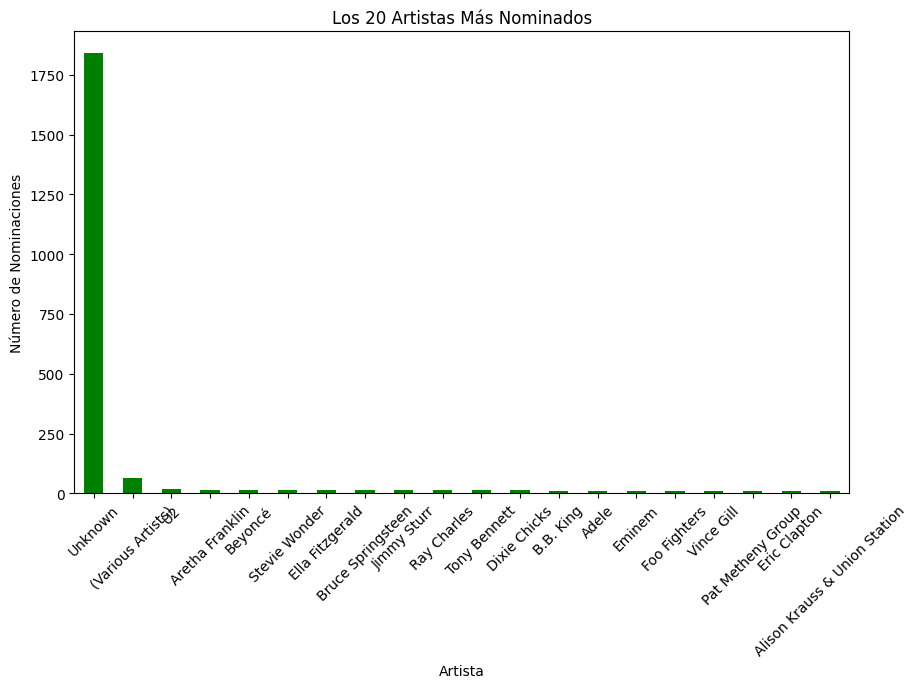

In [8]:
artistas = Grammys['artist'].value_counts()
plt.figure(figsize=(10, 6))
artistas.head(20).plot(kind='bar', color='green')
plt.title('Los 20 Artistas Más Nominados')
plt.xlabel('Artista')
plt.ylabel('Número de Nominaciones')
plt.xticks(rotation=45)
plt.show()

Se puede ver que la columna Unknow es la que tiene mayor nominaciones lo que se puede considerar como un dato atipico por lo que vamos a remplazarlo por un mensaje que nos diga 'Unregistered artist', para un mejor entendimiento en el analisis.

In [9]:
Grammys['artist'] = Grammys['artist'].replace('Unknown', 'Unregistered artist')
print(Grammys['artist'].value_counts())

artist
Unregistered artist                                           1840
(Various Artists)                                               66
U2                                                              18
Aretha Franklin                                                 16
Beyoncé                                                         13
                                                              ... 
The King's Singers                                               1
Peter Gabriel & Thomas Newman, songwriters (Peter Gabriel)       1
Beau Bridges, Cynthia Nixon & Blair Underwood                    1
They Might Be Giants                                             1
Rihanna Featuring Jay-Z                                          1
Name: count, Length: 1659, dtype: int64


Para la columna de los 10 trabajadores mas comunes 

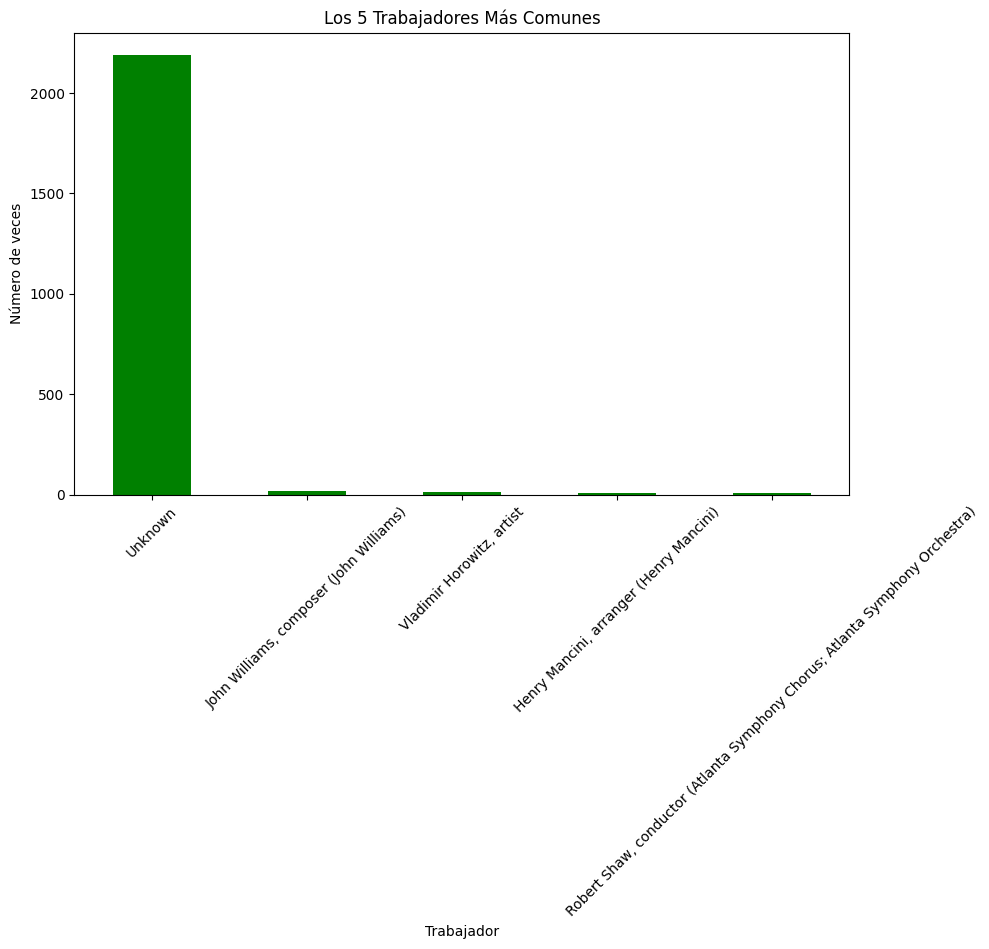

In [10]:
trabajadores = Grammys['workers'].value_counts()
plt.figure(figsize=(10, 6))
trabajadores.head(5).plot(kind='bar', color='green') 
plt.title('Los 5 Trabajadores Más Comunes')
plt.xlabel('Trabajador')
plt.ylabel('Número de veces')
plt.xticks(rotation=45)
plt.show()

Miramos que Unknow es el trabajador mas comun sin envargo este es un atipico pues no brinda mayor informacion, por lo que se va a convertir esta culomna por un mensaje que diga 'unregistered worker', para un mayor entendimiento surante el analisis.

In [11]:
Grammys['workers'] = Grammys['workers'].replace('Unknown', 'Unregistered worker')
print(Grammys['workers'].value_counts())

workers
Unregistered worker                                                                                                           2190
John Williams, composer (John Williams)                                                                                         20
Vladimir Horowitz, artist                                                                                                       15
Henry Mancini, arranger (Henry Mancini)                                                                                          8
Robert Shaw, conductor (Atlanta Symphony Chorus; Atlanta Symphony Orchestra)                                                     7
                                                                                                                              ... 
Booker T. Jones & Rob Schnapf, producers; Doug Boehm & Rob Schnapf, engineers/mixers                                             1
Dylan Dresdow & Padraic Kerin, engineers/mixers                            

Creamos un grafico de dispersion para ver la columna de 'year' y poder identificar algun dato atipico 

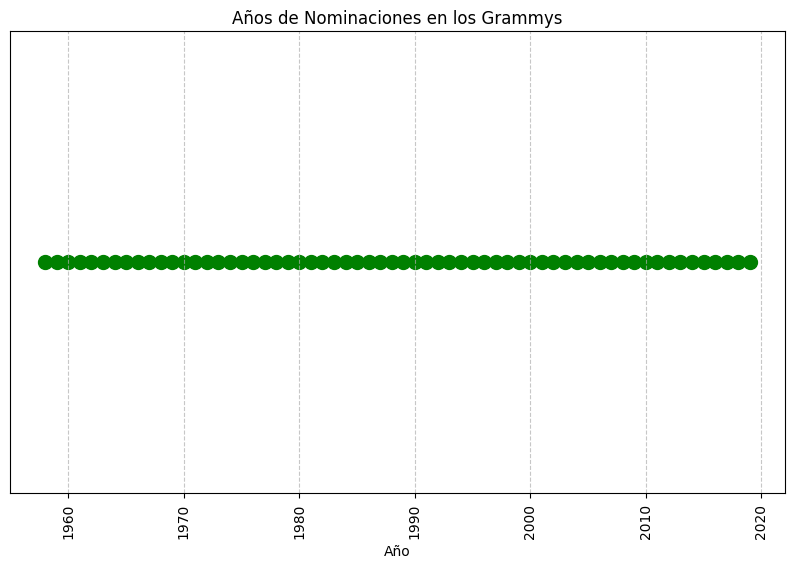

In [13]:
años_unicos = Grammys['year'].unique()

plt.figure(figsize=(10, 6))
plt.scatter(años_unicos, [1] * len(años_unicos), color='green', s=100)  
plt.title('Años de Nominaciones en los Grammys')
plt.xlabel('Año')
plt.yticks([])  
plt.xticks(rotation=90)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

No hay datos atipicos en esta columna 

Para la fila de category vamos a identificar la presencia de valores nulos mirando si hay valores en blanco o con la palabra Unknow.

In [14]:
datos_blancos = Grammys['category'].isnull()
datos_unknown = Grammys['category'].str.contains('Unknown', na=False)

conteo_blancos = datos_blancos.sum()
conteo_unknown = datos_unknown.sum()

print(f"Número de datos en blanco en 'category': {conteo_blancos}")
print(f"Número de datos con 'Unknown' en 'category': {conteo_unknown}")

Número de datos en blanco en 'category': 0
Número de datos con 'Unknown' en 'category': 0


Vemos que no hay ningun dato con estas condiciones lo que nos puede indicar que no hay datos atipicos en esta fila 

Hacemos lo mismo para la columna de nominee 

In [15]:
datos_blancos_nominee = Grammys['nominee'].isnull()
datos_unknown_nominee = Grammys['nominee'].str.contains('Unknown', na=False)

conteo_blancos_nominee = datos_blancos_nominee.sum()
conteo_unknown_nominee = datos_unknown_nominee.sum()

print(f"Número de datos en blanco en 'nominee': {conteo_blancos_nominee}")
print(f"Número de datos con 'Unknown' en 'nominee': {conteo_unknown_nominee}")

Número de datos en blanco en 'nominee': 0
Número de datos con 'Unknown' en 'nominee': 6


Se puede ver que hay presencia de 6 valores Uknow por lo que lo vamos a remplazar por 'unregistered nominee' para un mayor entendimiento.

In [16]:
Grammys['nominee'] = Grammys['nominee'].replace('Unknown', 'unregistered nominee')
print(Grammys['nominee'].value_counts())

nominee
Berlioz: Requiem              7
Bridge Over Troubled Water    7
Steven Epstein                7
Robert Woods                  7
Britten: War Requiem          6
                             ..
The Art Of Romance            1
Devils & Dust                 1
B.Y.O.B.                      1
Before I Forget               1
Here It Goes Again            1
Name: count, Length: 4132, dtype: int64


Hacemos lo mismo para la columna 'img'

In [19]:
datos_blancos_img = Grammys['img'].isnull()
datos_unknown_img = Grammys['img'].str.contains('Unknown', na=False)

conteo_blancos_img = datos_blancos_img.sum()
conteo_unknown_img = datos_unknown_img.sum()

print(f"Número de datos en blanco en 'img': {conteo_blancos_img}")
print(f"Número de datos con 'Unknown' en 'img': {conteo_unknown_img}")

Número de datos en blanco en 'img': 0
Número de datos con 'Unknown' en 'img': 1367


Vemos que hay 1.367 valores Unknown los vamos a remplazar con el mensaje 'image not available' para un mejor entendimiento 

In [20]:
Grammys['img'] = Grammys['img'].replace('Unknown', 'image not available')
print(Grammys['img'].value_counts())

img
image not available                                                                                                                                      1367
https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/John%2BWilliams/John%2520Williams_1_1_1597170495.jpg?itok=GsnrkP98              26
https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/U2/U2_1_1_1578385236.jpg?itok=rQVhxxhL                                          22
https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Vladimir%2BHorowitz/Vladimir%2520Horowitz_1_1_1597176026.jpg?itok=QiT9d29e      21
https://www.grammy.com/sites/com/files/styles/artist_circle/public/muzooka/Henry%2BMancini/Henry%2520Mancini_1_1_1581553583.jpg?itok=oMIyl-mj              20
                                                                                                                                                         ... 
https://www.grammy.com/sites/com/files/styles/ar

Lo mismo hacemos con la columna 'title' 

In [22]:
datos_blancos_title = Grammys['img'].isnull()
datos_unknown_title = Grammys['img'].str.contains('Unknown', na=False)

conteo_blancos_title = datos_blancos_title.sum()
conteo_unknown_title = datos_unknown_title.sum()

print(f"Número de datos en blanco en 'title': {conteo_blancos_title}")
print(f"Número de datos con 'Unknown' en 'title': {conteo_unknown_title}")

Número de datos en blanco en 'title': 0
Número de datos con 'Unknown' en 'title': 0


Vemos que no hay filas vacias ni señaladas como Unknown

Para las columnas de 'published_at' y 'update_at', vamos a ver si tiene filas vacias o valores marcados como Unknown, convertimos en formato de fecha para segurar una correcta lectura de las columnas, Verificamos si alguna de estas fechas esta fuera de un rango lógico al igual que si la fecha de publicación es posterior a la de actualización

In [25]:
Grammys['published_at'] = Grammys['published_at'].replace("Unknown", pd.NaT)
Grammys['updated_at'] = Grammys['updated_at'].replace("Unknown", pd.NaT)

published_at_null = Grammys['published_at'].isnull().sum()
updated_at_null = Grammys['updated_at'].isnull().sum()
print(f"Valores nulos en published_at: {published_at_null}, en updated_at: {updated_at_null}")

Grammys['published_at'] = pd.to_datetime(Grammys['published_at'], errors='coerce')
Grammys['updated_at'] = pd.to_datetime(Grammys['updated_at'], errors='coerce')

fechas_atipicas = Grammys[(Grammys['published_at'] < '1950-01-01') | (Grammys['published_at'] > '2025-01-01')]
print(f"Fechas atípicas en published_at: \n{fechas_atipicas}")

fechas_inconsistentes = Grammys[Grammys['published_at'] > Grammys['updated_at']]
print(f"Fechas inconsistentes (published_at después de updated_at): \n{fechas_inconsistentes}")

Valores nulos en published_at: 0, en updated_at: 0
Fechas atípicas en published_at: 
Empty DataFrame
Columns: [year, title, published_at, updated_at, category, nominee, artist, workers, img, winner, desc_length]
Index: []
Fechas inconsistentes (published_at después de updated_at): 
Empty DataFrame
Columns: [year, title, published_at, updated_at, category, nominee, artist, workers, img, winner, desc_length]
Index: []


Los resultados indican que no hay fechas atípicas ni inconsistentes en las columnas published_at y updated_at

En la columna de 'winner' vamos a ver si hay valore fuera de True or False 

In [35]:
winner_atipicos = Grammys[~Grammys['winner'].isin([True, False])]
print(f"Valores atípicos en winner: \n{winner_atipicos}")

Valores atípicos en winner: 
Empty DataFrame
Columns: [year, title, published_at, updated_at, category, nominee, artist, workers, img, winner, desc_length]
Index: []


Vemos que no hay valores fuera de lo comun en esta columna 

#### Se van a generar graficas de las diversas columnas del dataset para sacar informacion relevante del dataset y entender la relacion entre sus columnas 

#### year

Creamos un grafico de barras para ver el comportamiento de las nomincaiones por año 

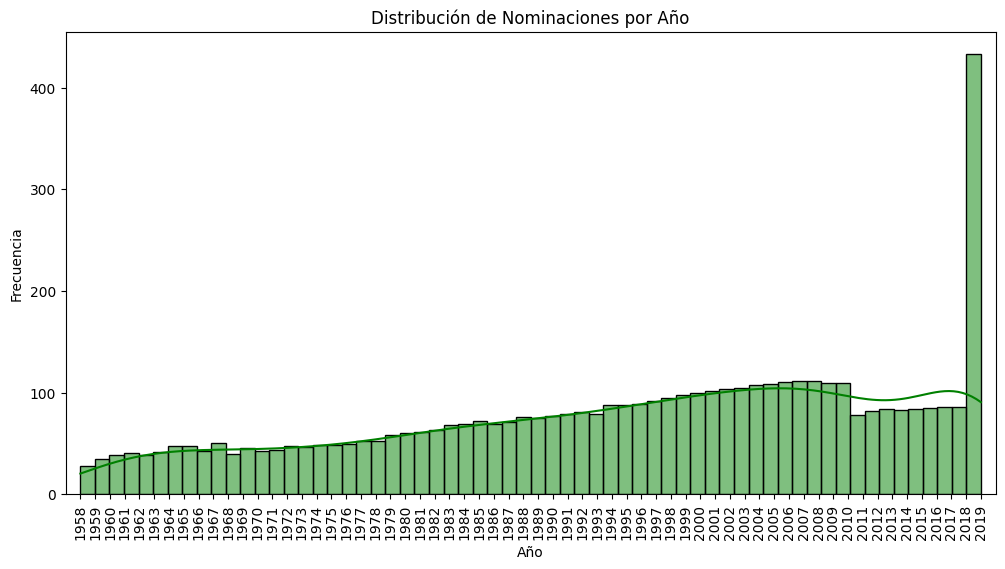

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(Grammys['year'], bins=len(Grammys['year'].unique()), kde=True, color='green')  
plt.title('Distribución de Nominaciones por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xlim(Grammys['year'].min() - 1, Grammys['year'].max() + 1)
años_unicos = Grammys['year'].unique()
plt.xticks(años_unicos, rotation=90)  
plt.show()

Se puede ver un aumento notable en 2019 muy por encima de los otros años.al igual que se observa como las nominacion han ido aumentando atravez de los años probablemente por que han ido aumentando tambien el numero de categorias por año.

#### Category

Creamos un grafico de barras para ver las 10 categorias mas populares en los años en las entregas de los grammys 

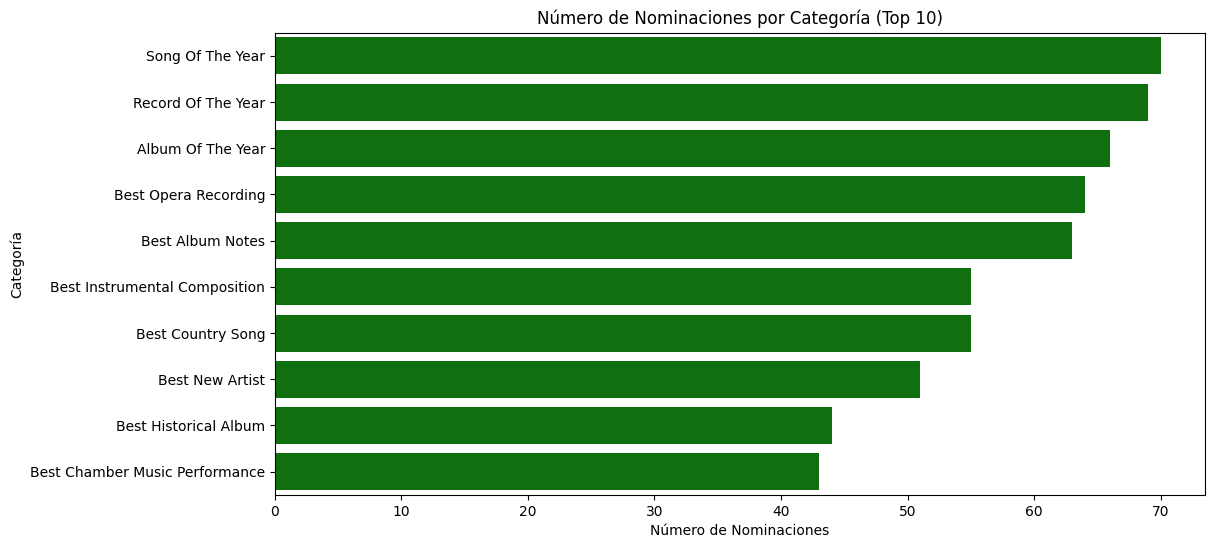

In [55]:
plt.figure(figsize=(12, 6))
top_categorias = Grammys['category'].value_counts().nlargest(10).index
top_nominaciones = Grammys[Grammys['category'].isin(top_categorias)]
sns.countplot(data=top_nominaciones, y='category', order=top_categorias, color='green')
plt.title('Número de Nominaciones por Categoría (Top 10)')
plt.xlabel('Número de Nominaciones')
plt.ylabel('Categoría')
plt.show()

Las mas populares son Song of the year y Record of year categorias que han ido prevalecido en esta entrega de premios a lo largo de lop años  

Hacemos lo mismo pero con las menos populares 

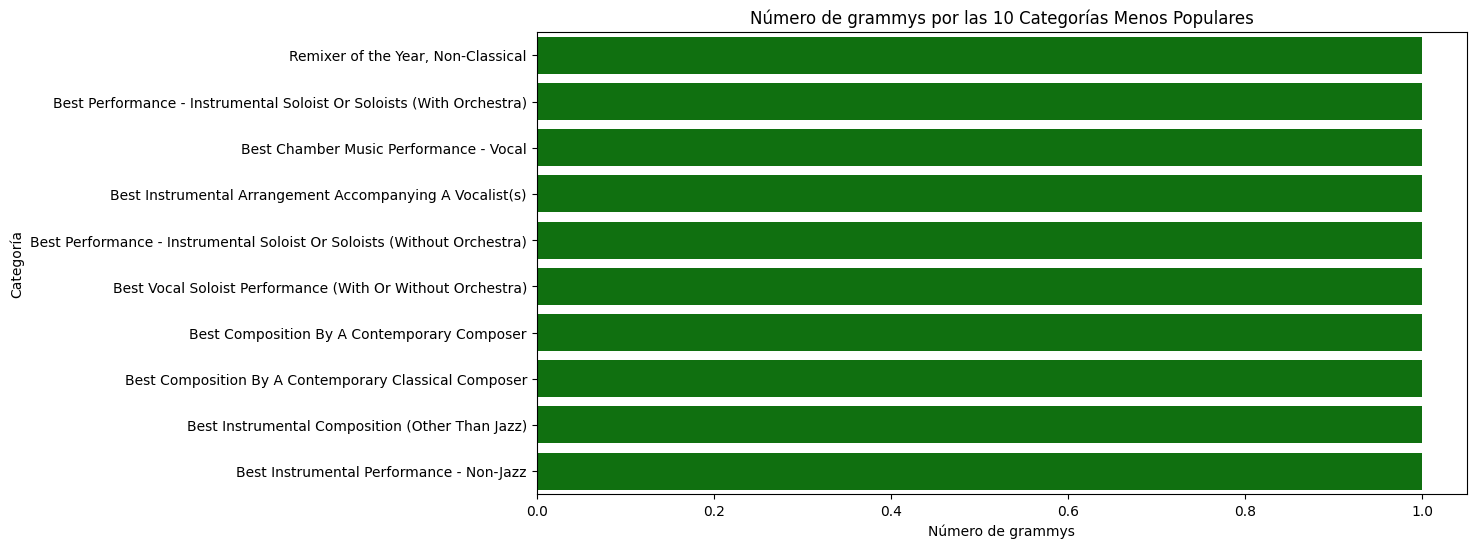

In [98]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Grammys, y='category', color='green', order=Grammys['category'].value_counts().nsmallest(10).index)
plt.title('Número de grammys por las 10 Categorías Menos Populares')
plt.xlabel('Número de grammys')
plt.ylabel('Categoría')
plt.show()

Tenemos que estas categorias usualmente solo han participado en una entrega de los grammys y no han tenido una relevancia ni participacion recurrente como si lo han hecho las otras 

#### Artist 

Cremos un grafico de barras para ver cuales son los mas nominados excluyendo filas que no tengan un artista registrado o esten calificados como varios artistas 

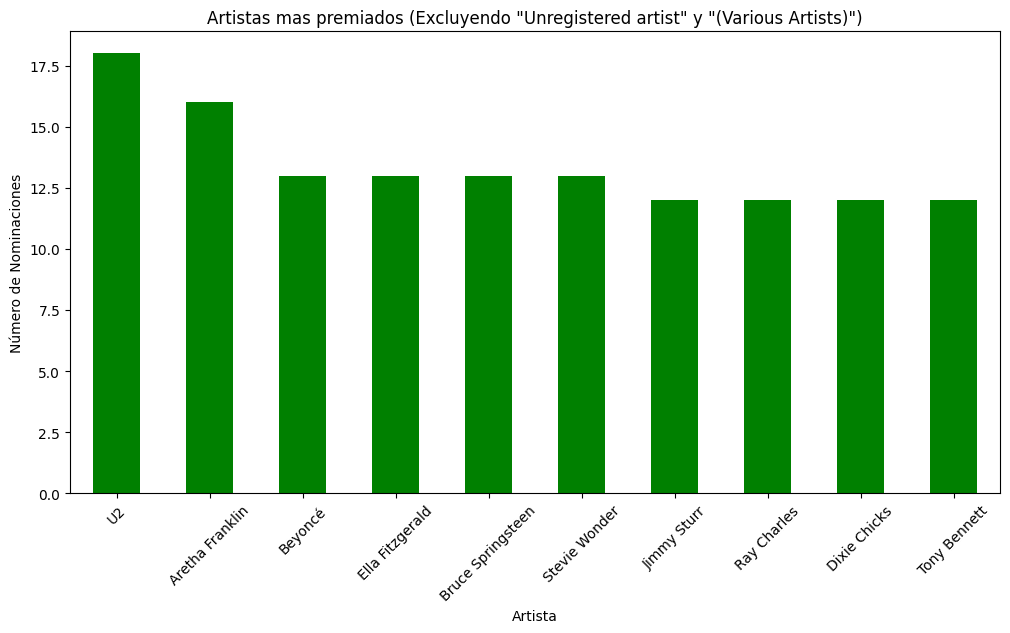

In [97]:
filtrado = Grammys[~Grammys['artist'].isin(['Unregistered artist', '(Various Artists)'])]
nominacion_artista = filtrado['artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
nominacion_artista.plot(kind='bar', color='green')
plt.title('Artistas mas premiados (Excluyendo "Unregistered artist" y "(Various Artists)")')
plt.xlabel('Artista')
plt.ylabel('Número de Nominaciones')
plt.xticks(rotation=45)
plt.show()


Tenemos que le artista con mas premios es la banda U2 y le siguen Aretha Franklin con una diferenci reducida, le siguen los otros artistas que se pueden ver en la grafica. 

Creamos un grafico para ver las categorias en las que han ganado estos 10 artistas mas premiados, para ver las categorias en las que se destacan 

In [82]:
filtrado = Grammys[~Grammys['artist'].isin(['Unregistered artist', '(Various Artists)'])]
top_artistas = filtrado[Grammys['artist'].isin(Grammys['artist'].value_counts().head(10).index)]
nominaciones_pivot = top_artistas.pivot_table(index='artist', columns='category', aggfunc='size', fill_value=0)
print(nominaciones_pivot)

category           Album Of The Year  Best Alternative Music Album  \
artist                                                               
Aretha Franklin                    0                             0   
Beyoncé                            0                             0   
Bruce Springsteen                  0                             0   
Ella Fitzgerald                    0                             0   
Jimmy Sturr                        0                             0   
Ray Charles                        0                             0   
Stevie Wonder                      3                             0   
U2                                 2                             1   

category           Best Compilation Soundtrack Album For Motion Picture, Television Or Other Visual Media  \
artist                                                                                                      
Aretha Franklin                                                    0             

/tmp/ipykernel_100384/1544576401.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_artistas = filtrado[Grammys['artist'].isin(Grammys['artist'].value_counts().head(10).index)]


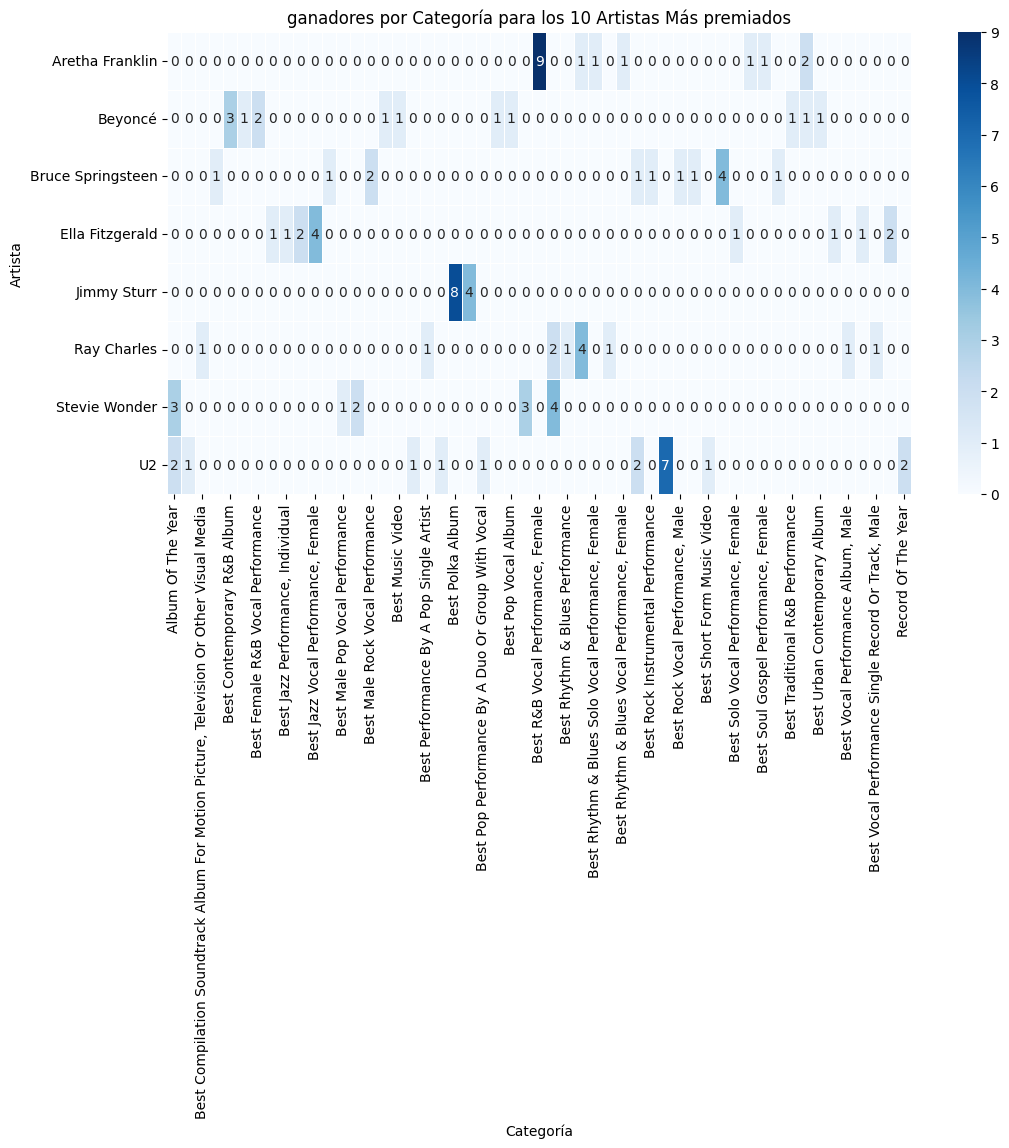

In [96]:
plt.figure(figsize=(12, 6))
sns.heatmap(nominaciones_pivot, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('ganadores por Categoría para los 10 Artistas Más premiados')
plt.xlabel('Categoría')
plt.ylabel('Artista')
plt.xticks(rotation=90)
plt.show()

Se puede ver que lgunos artistas muestran una tendencia a ser ganadores en múltiples categorías, reflejando su versatilidad, mientras que otros se destacan en una categoría particular. Como es el caso de Aretrha Franklin o Jimmy Sturr que se destacan en una o 2 categorias en mas de una ocacion, mientras que artistas como Beyonce suele destacar en las diferentes categorias. 

Creamos un grafico que nos permita ver la categoria con mas ganadores por año 

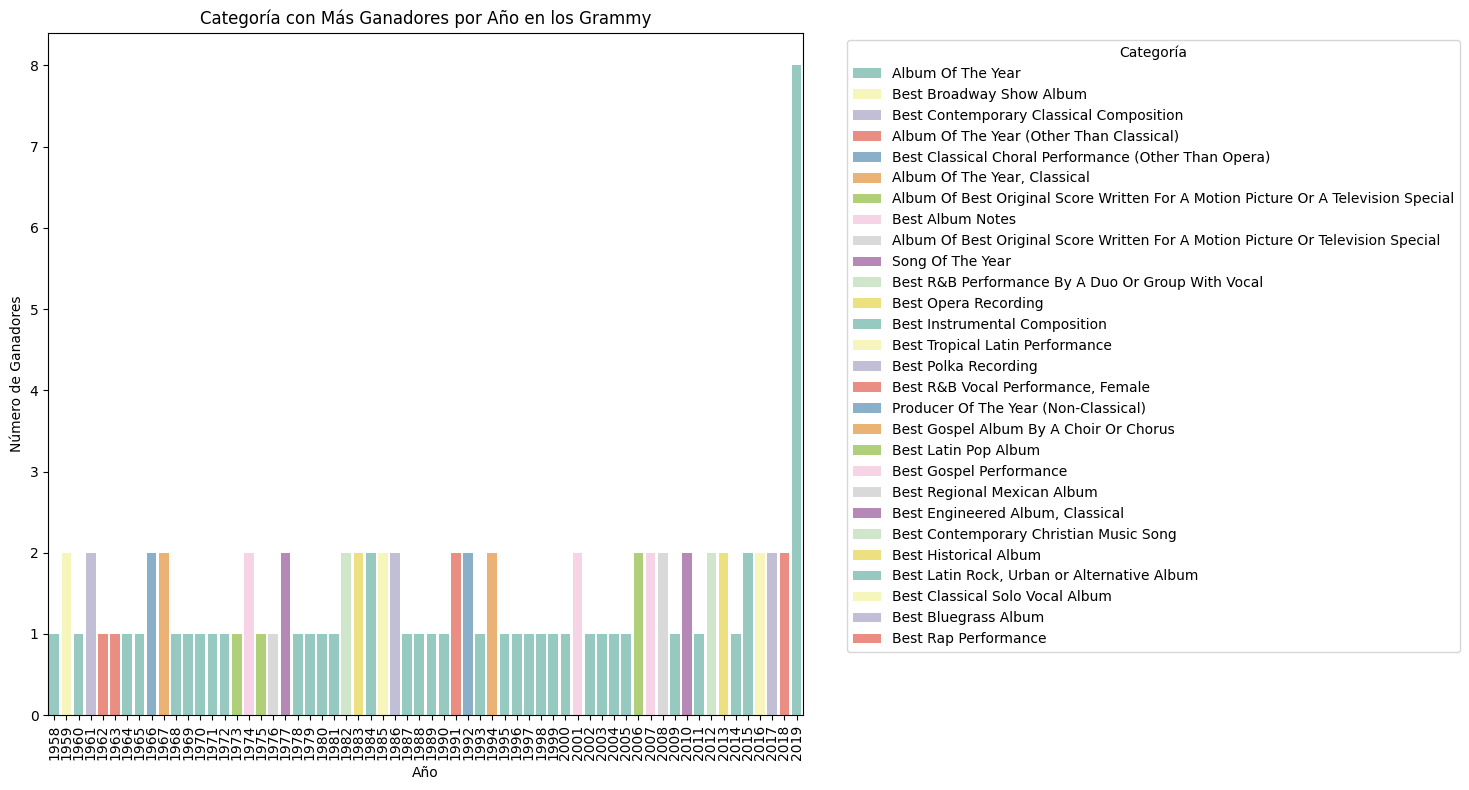

In [112]:
ganadores = Grammys[Grammys['winner'] == True]

ganadores_por_categoria = ganadores.groupby(['year', 'category']).size().reset_index(name='count')

categoria_max_por_anio = ganadores_por_categoria.loc[ganadores_por_categoria.groupby('year')['count'].idxmax()]

plt.figure(figsize=(15, 8))
sns.barplot(x='year', y='count', hue='category', data=categoria_max_por_anio, dodge=False, palette='Set3')
plt.title('Categoría con Más Ganadores por Año en los Grammy')
plt.xlabel('Año')
plt.ylabel('Número de Ganadores')
plt.xticks(rotation=90)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Se puede ver que categorías como “Album of the Year” y “Best New Artist” aparecen con frecuencia, indicando su importancia y la cantidad de artistas destacados en estas áreas. Tambien se puede ver que como el aumento o disminución de la popularidad de ciertas categorías.

Se crea un grafico para ver los trabajadores mas comunes en las entregas de los grammys excluyendo las filas en las que nos se registro un trabajador 

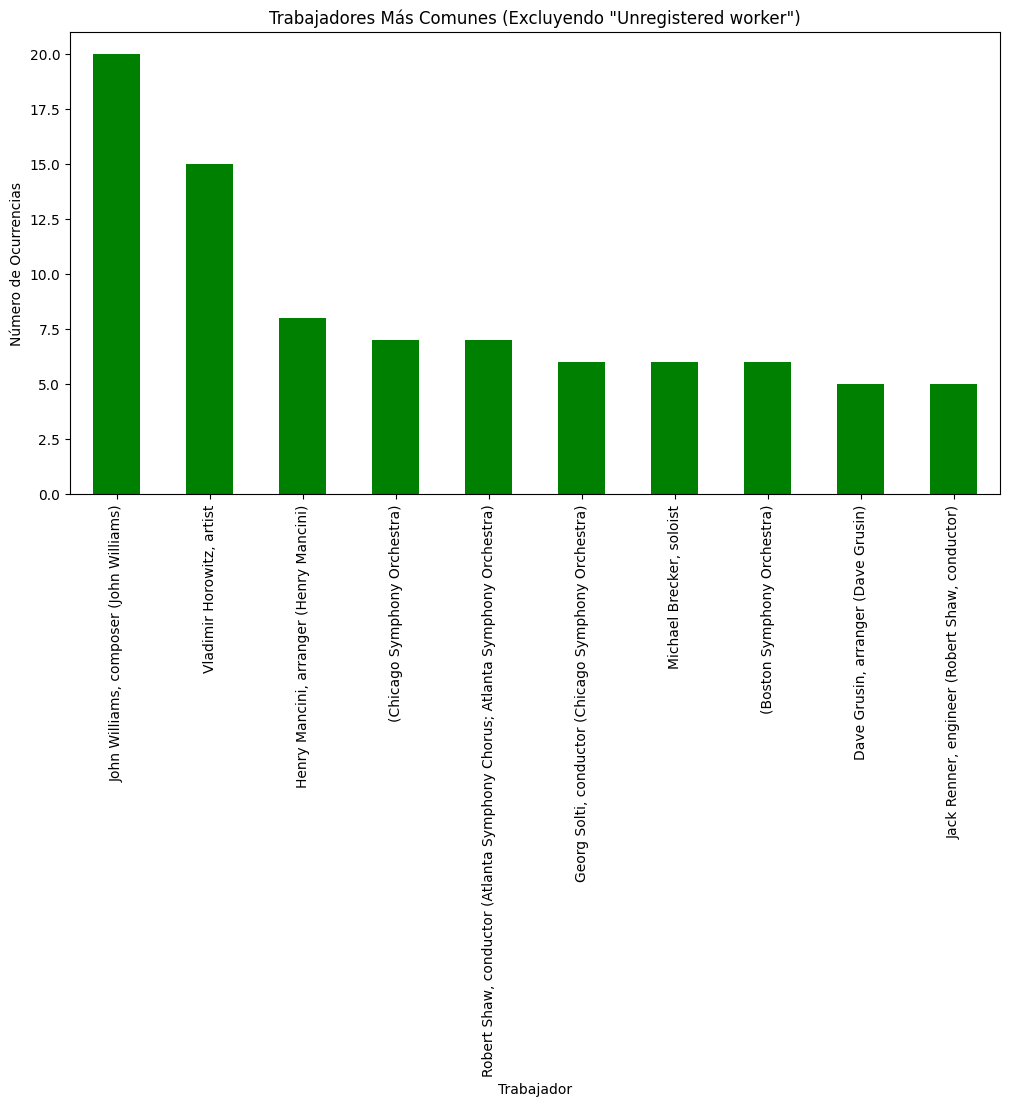

In [126]:
filtro_workers = Grammys[Grammys['workers'] != 'Unregistered worker']
worker_cantidad = filtro_workers['workers'].value_counts().head(10)

plt.figure(figsize=(12, 6))
worker_cantidad.plot(kind='bar', color='green')
plt.title('Trabajadores Más Comunes (Excluyendo "Unregistered worker")')
plt.xlabel('Trabajador')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=90)
plt.show()


Se puede observar que la barra más alta alcanza aproximadamente el 17.5%, lo que indica que este tipo de trabajador tiene el porcentaje más alto en comparación con los otros tipos mostrados en la gráfica.

#### Concluciones 